In [19]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [6]:
df = pd.read_csv('crime_dataset_india.csv')

## Basic Analysis Of Data

In [7]:
df.info()      

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40160 entries, 0 to 40159
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Report Number       40160 non-null  int64 
 1   Date Reported       40160 non-null  object
 2   Date of Occurrence  40160 non-null  object
 3   Time of Occurrence  40160 non-null  object
 4   City                40160 non-null  object
 5   Crime Code          40160 non-null  int64 
 6   Crime Description   40160 non-null  object
 7   Victim Age          40160 non-null  int64 
 8   Victim Gender       40160 non-null  object
 9   Weapon Used         34370 non-null  object
 10  Crime Domain        40160 non-null  object
 11  Police Deployed     40160 non-null  int64 
 12  Case Closed         40160 non-null  object
 13  Date Case Closed    20062 non-null  object
dtypes: int64(4), object(10)
memory usage: 4.3+ MB


#### Finding and Handling Missing Values 

In [8]:
print(df.isnull().sum())

Report Number             0
Date Reported             0
Date of Occurrence        0
Time of Occurrence        0
City                      0
Crime Code                0
Crime Description         0
Victim Age                0
Victim Gender             0
Weapon Used            5790
Crime Domain              0
Police Deployed           0
Case Closed               0
Date Case Closed      20098
dtype: int64


- Missing values appear in Weapon Used and Date Case Closed columns

In [9]:
# Missing values in weapons
missing_weapon = df['Weapon Used'].isnull().sum()
print(f"Missing values in 'Weapon Used': {missing_weapon}")

Missing values in 'Weapon Used': 5790


In [10]:
df.fillna({'Weapon Used': "Unknown"}, inplace=True)      # filling missing values with 'Unknown'

In [11]:
# Missing values in Date Case Closed
missing_case_closed = df['Date Case Closed'].isnull().sum()
print(f"Missing values in 'Date Case Closed': {missing_case_closed}")

Missing values in 'Date Case Closed': 20098


In [12]:
df['Case Status'] = df['Date Case Closed'].notnull().map({True: 'Closed', False: 'Open'})      # creating new column 'Case Status'

In [13]:
df.head()

,Report Number,Date Reported,Date of Occurrence,Time of Occurrence,City,Crime Code,Crime Description,Victim Age,Victim Gender,Weapon Used,Crime Domain,Police Deployed,Case Closed,Date Case Closed,Case Status
0,1,02-01-2020 00:00,01-01-2020 00:00,01-01-2020 01:11,Ahmedabad,576,IDENTITY THEFT,16,M,Blunt Object,Violent Crime,13,No,NaN,Open
1,2,01-01-2020 19:00,01-01-2020 01:00,01-01-2020 06:26,Chennai,128,HOMICIDE,37,M,Poison,Other Crime,9,No,NaN,Open
2,3,02-01-2020 05:00,01-01-2020 02:00,01-01-2020 14:30,Ludhiana,271,KIDNAPPING,48,F,Blunt Object,Other Crime,15,No,NaN,Open
3,4,01-01-2020 05:00,01-01-2020 03:00,01-01-2020 14:46,Pune,170,BURGLARY,49,F,Firearm,Other Crime,1,Yes,29-04-2020 05:00,Closed
4,5,01-01-2020 21:00,01-01-2020 04:00,01-01-2020 16:51,Pune,421,VANDALISM,30,F,Other,Other Crime,18,Yes,08-01-2020 21:00,Closed


##### Convert date columns to datetime type of pandas

In [14]:
date_cols = ['Date Reported', 'Date of Occurrence', 'Date Case Closed']

for col in date_cols:
    df[col] = pd.to_datetime(df[col], format="%d-%m-%Y %H:%M", errors='coerce') 

##### Data types of columns

In [15]:
print(df.dtypes)

Report Number                  int64
Date Reported         datetime64[ns]
Date of Occurrence    datetime64[ns]
Time of Occurrence            object
City                          object
Crime Code                     int64
Crime Description             object
Victim Age                     int64
Victim Gender                 object
Weapon Used                   object
Crime Domain                  object
Police Deployed                int64
Case Closed                   object
Date Case Closed      datetime64[ns]
Case Status                   object
dtype: object


In [16]:
# modified head
df.head()

,Report Number,Date Reported,Date of Occurrence,Time of Occurrence,City,Crime Code,Crime Description,Victim Age,Victim Gender,Weapon Used,Crime Domain,Police Deployed,Case Closed,Date Case Closed,Case Status
0,1,2020-01-02 00:00:00,2020-01-01 00:00:00,01-01-2020 01:11,Ahmedabad,576,IDENTITY THEFT,16,M,Blunt Object,Violent Crime,13,No,NaT,Open
1,2,2020-01-01 19:00:00,2020-01-01 01:00:00,01-01-2020 06:26,Chennai,128,HOMICIDE,37,M,Poison,Other Crime,9,No,NaT,Open
2,3,2020-01-02 05:00:00,2020-01-01 02:00:00,01-01-2020 14:30,Ludhiana,271,KIDNAPPING,48,F,Blunt Object,Other Crime,15,No,NaT,Open
3,4,2020-01-01 05:00:00,2020-01-01 03:00:00,01-01-2020 14:46,Pune,170,BURGLARY,49,F,Firearm,Other Crime,1,Yes,2020-04-29 05:00:00,Closed
4,5,2020-01-01 21:00:00,2020-01-01 04:00:00,01-01-2020 16:51,Pune,421,VANDALISM,30,F,Other,Other Crime,18,Yes,2020-01-08 21:00:00,Closed


#### Analyzing missing values using HeatMap

### Missing Values Heatmap

The heatmap below visualizes the distribution of missing values across different columns in the dataset. This graphical representation helps in quickly identifying which columns have missing data and the extent of these missing values.

- **'Date Reported' and 'Date Case Closed' Columns**: These columns exhibit the highest number of missing values. This could be due to incomplete reporting or delays in updating the case status.
- **'Weapon Used' Column**: Initially, this column had missing values, which were subsequently filled with the placeholder 'Unknown'. This ensures that the analysis can proceed without being hindered by missing data in this column.
- **Overall Data Quality**: The heatmap indicates that while some columns have significant missing values, the majority of the dataset is complete, allowing for robust analysis.

The heatmap is a crucial tool for data preprocessing, as it highlights areas that may need further attention, such as imputation or exclusion of certain columns from the analysis.

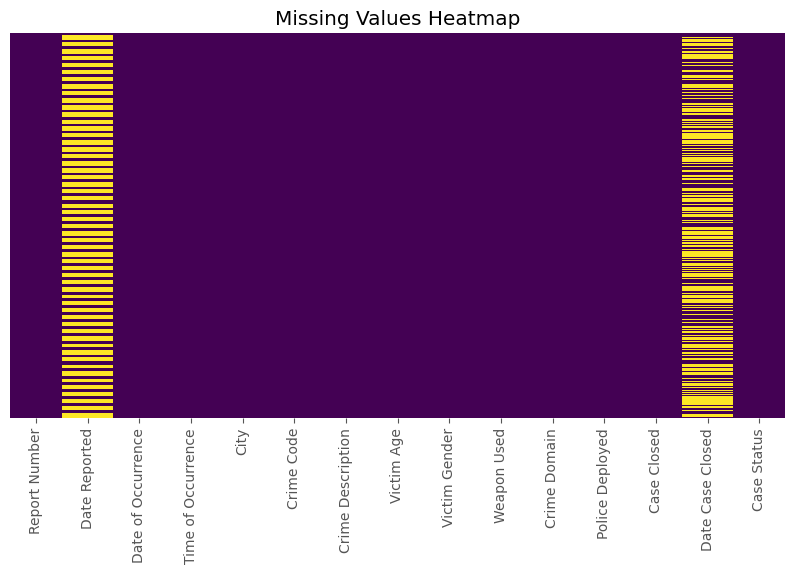

In [ ]:
plt.figure(figsize=(10, 5))
sns.heatmap(df.isnull(), cmap='viridis', cbar=False, yticklabels=False)
plt.title("Missing Values Heatmap")
plt.show()


- Date Reported and Date Case Closed are the ones with maximum missing values

# Univariate Analysis

### Crime Frequency & Distribution

#### Crime Codes Analysis

In [72]:
df['Crime Code'].unique()

array([576, 128, 271, 170, 421, 442, 172, 169, 338, 497, 260, 563, 498,
       436, 266, 357, 509, 342, 480, 369, 251, 374, 507, 322, 527, 282,
       247, 489, 387, 517, 570, 222, 319, 575, 341, 396, 187, 280, 487,
       154, 148, 583, 300, 297, 555, 139, 561, 573, 211, 312, 548, 596,
       188, 110, 449, 352, 196, 359, 495, 259, 289, 409, 306, 420, 469,
       292, 512, 244, 269, 524, 404, 191, 229, 197, 305, 150, 542, 438,
       345, 108, 219, 510, 597, 272, 413, 355, 523, 486, 455, 515, 566,
       419, 250, 417, 464, 500, 183, 270, 184, 353, 235, 287, 257, 537,
       277, 321, 432, 129, 347, 127, 117, 339, 111, 331, 295, 309, 465,
       406, 278, 569, 445, 113, 165, 514, 262, 558, 157, 241, 311, 248,
       238, 109, 448, 588, 236, 589, 492, 234, 470, 518, 245, 144, 134,
       584, 541, 133, 422, 151, 415, 268, 381, 249, 389, 562, 316, 367,
       471, 365, 484, 427, 340, 246, 376, 439, 598, 239, 267, 163, 572,
       336, 218, 276, 307, 153, 190, 429, 547, 136, 254, 105, 41

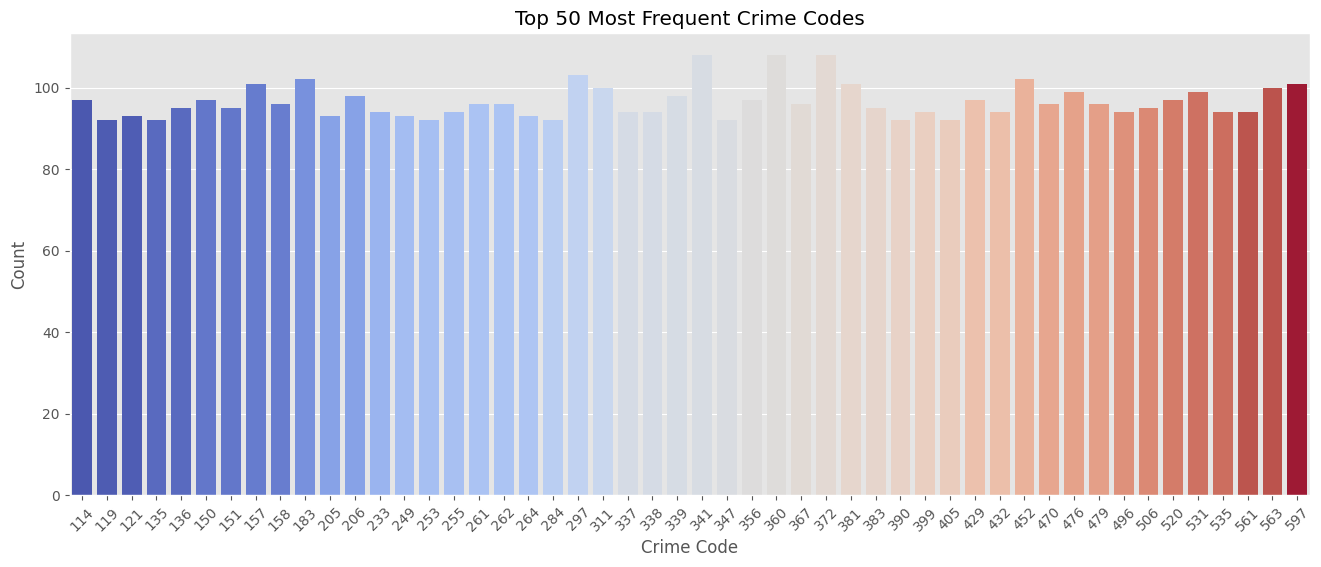

In [ ]:
# analyzing crime codes of top 50 commited crimes
plt.figure(figsize=(16, 6))
sns.barplot(x=df['Crime Code'].value_counts().index[:50], y=df['Crime Code'].value_counts().values[:50], palette='coolwarm', hue=df['Crime Code'].value_counts().index[:50], legend=False)
plt.title("Top 50 Most Frequent Crime Codes")
plt.xlabel("Crime Code")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

#### Crime Description Analysis

In [76]:
df['Crime Description'].unique()

array(['IDENTITY THEFT', 'HOMICIDE', 'KIDNAPPING', 'BURGLARY',
       'VANDALISM', 'ASSAULT', 'VEHICLE - STOLEN', 'COUNTERFEITING',
       'EXTORTION', 'PUBLIC INTOXICATION', 'FRAUD', 'SEXUAL ASSAULT',
       'DRUG OFFENSE', 'ARSON', 'CYBERCRIME', 'TRAFFIC VIOLATION',
       'SHOPLIFTING', 'ILLEGAL POSSESSION', 'FIREARM OFFENSE', 'ROBBERY',
       'DOMESTIC VIOLENCE'], dtype=object)

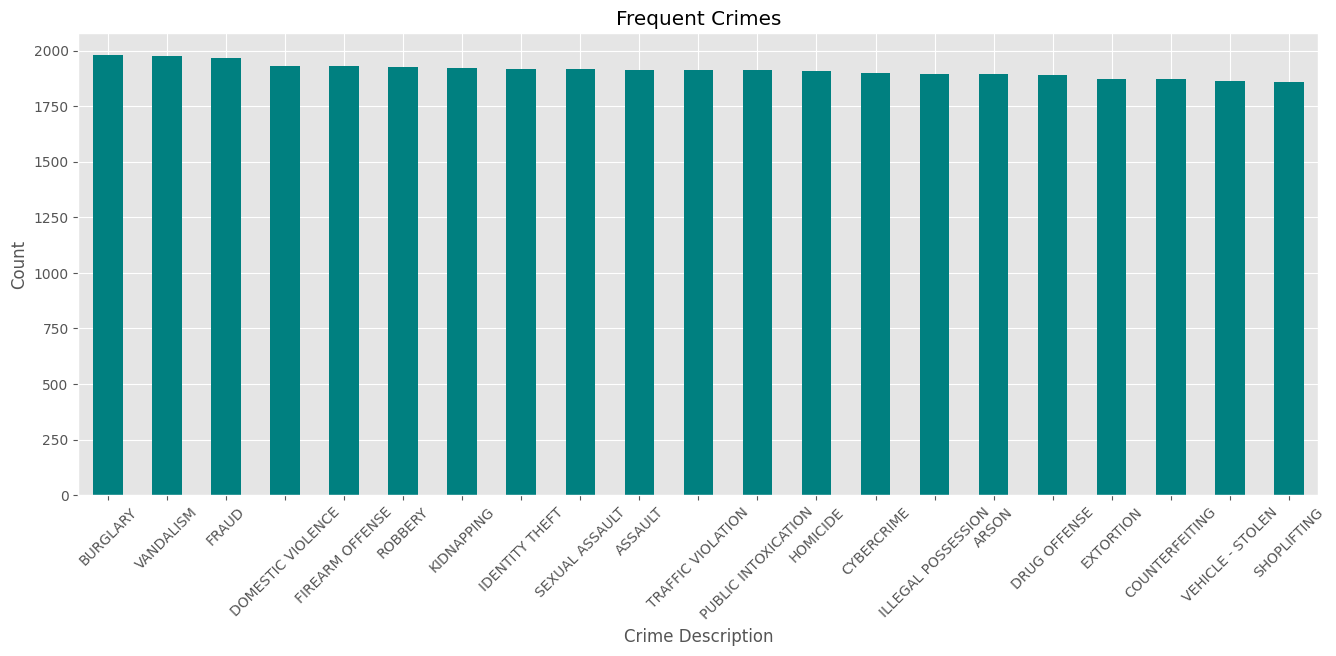

In [97]:
# crime description analysis
plt.figure(figsize=(16, 6))
df['Crime Description'].value_counts().plot(kind='bar', color='teal')
plt.title("Frequent Crimes")
plt.xlabel("Crime Description")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

- Overall uniform distribution of crime codes and crime description in the dataset

#### City Wise Analysis

In [80]:
df['City'].unique()

array(['Ahmedabad', 'Chennai', 'Ludhiana', 'Pune', 'Delhi', 'Mumbai',
       'Surat', 'Visakhapatnam', 'Bangalore', 'Kolkata', 'Ghaziabad',
       'Hyderabad', 'Jaipur', 'Lucknow', 'Bhopal', 'Patna', 'Kanpur',
       'Varanasi', 'Nagpur', 'Meerut', 'Thane', 'Indore', 'Rajkot',
       'Vasai', 'Agra', 'Kalyan', 'Nashik', 'Srinagar', 'Faridabad'],
      dtype=object)

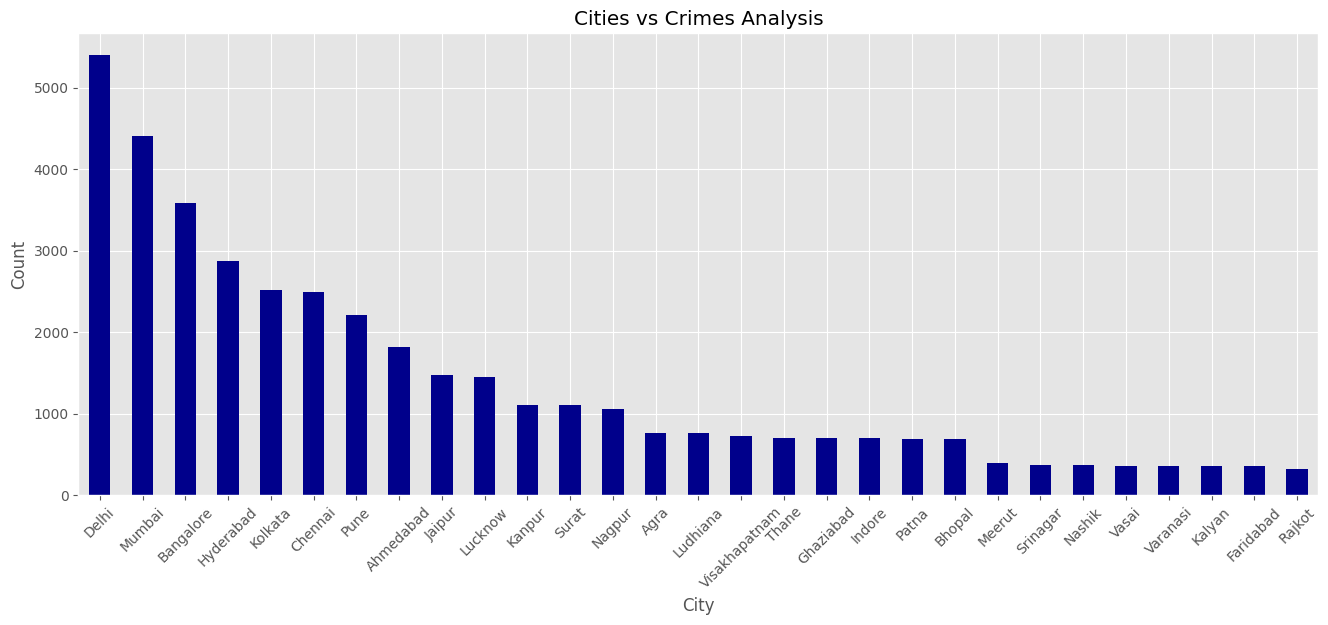

In [98]:
# analyzing cities crime rates
plt.figure(figsize=(16, 6))
df['City'].value_counts().plot(kind='bar', color='darkblue')
plt.title("Cities vs Crimes Analysis")
plt.xlabel("City")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

- **High Crime Rates in Metropolitan Cities**: The graph indicates that metropolitan cities have significantly higher crime rates compared to non-metropolitan cities.
- **Disparity in Crime Rates**: There is a noticeable disparity in crime rates between metropolitan and non-metropolitan cities, with metropolitan areas experiencing more crimes.

#### Age Analysis of Victims

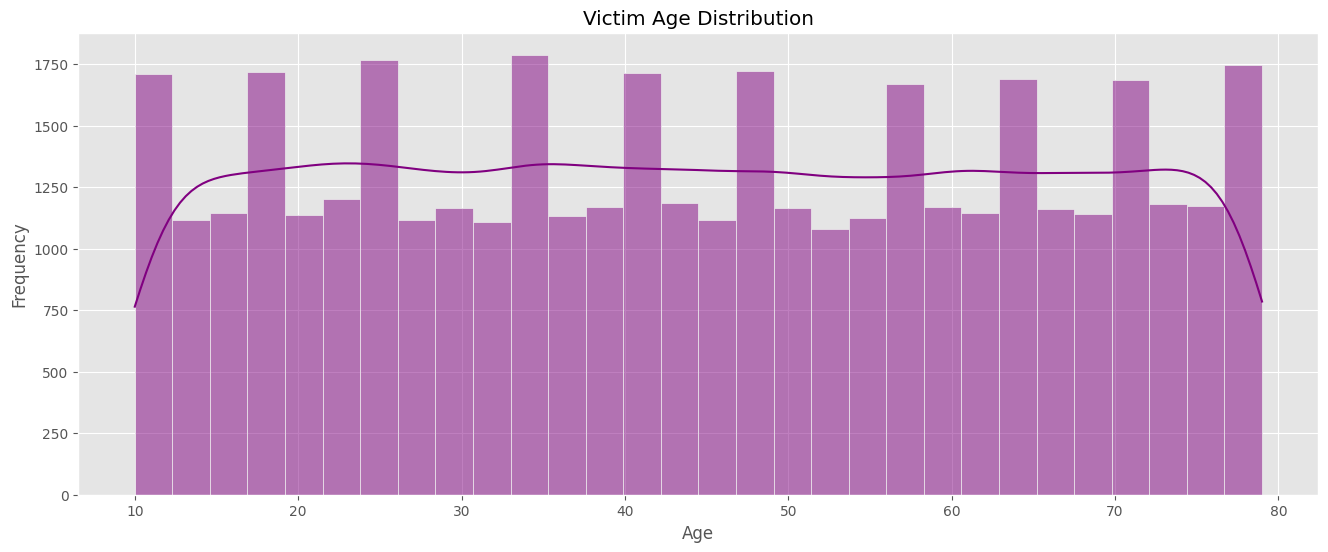

In [99]:
# analysis of victims
plt.figure(figsize=(16, 6))
sns.histplot(df['Victim Age'], bins=30, kde=True, color='purple')
plt.title("Victim Age Distribution")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

- **Age Distribution**: The histogram shows the distribution of victim ages, with a noticeable peak around the younger age groups. This indicates that younger individuals are more frequently victims of crimes.

- **Skewness**: The distribution appears to be right-skewed, suggesting that there are fewer older victims compared to younger ones.

- **Outliers**: There are some outliers in the higher age range, indicating that while less common, older individuals can also be victims of crimes.

#### Analysing Gender Distributions

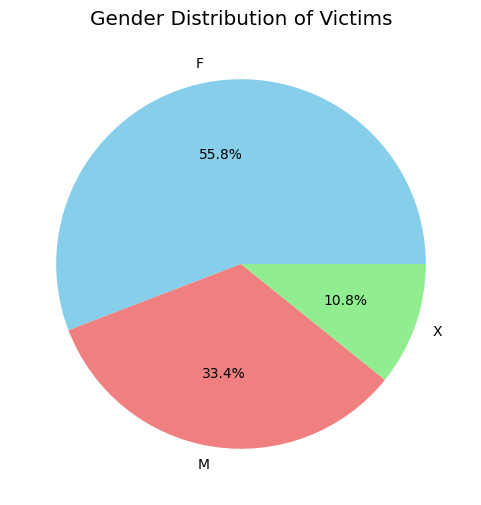

In [100]:
# analysing sex distribution of victims
plt.figure(figsize=(6, 6))
df['Victim Gender'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['skyblue', 'lightcoral', 'lightgreen'])
plt.title("Gender Distribution of Victims")
plt.ylabel("")
plt.show()

- Trend shows more than 55% of the victims are female

In [84]:
df['Weapon Used'].unique()

array(['Blunt Object', 'Poison', 'Firearm', 'Other', 'Knife',
       'Explosives', 'Unknown'], dtype=object)

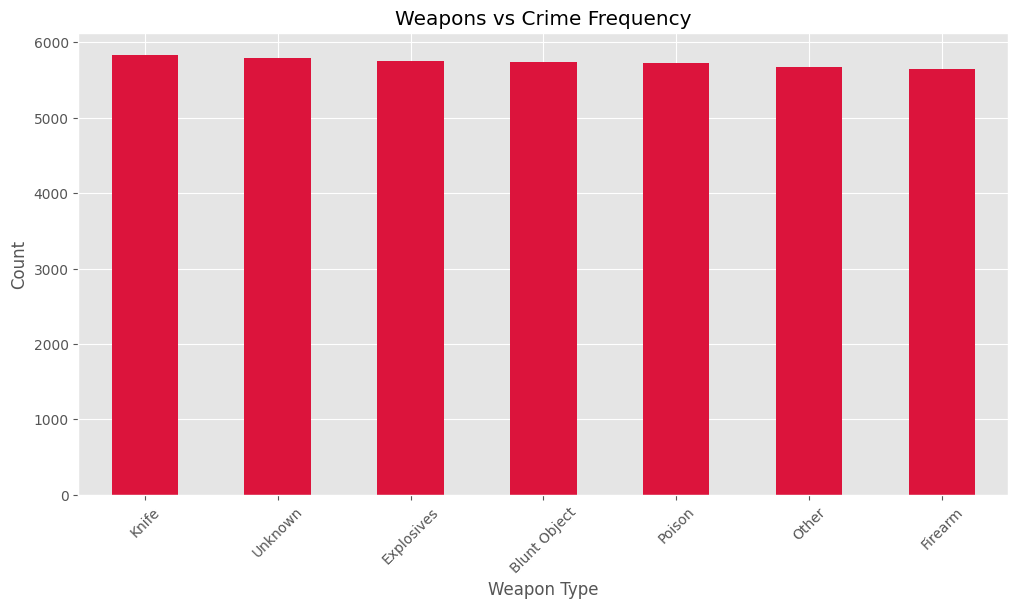

In [101]:
plt.figure(figsize=(12, 6))
df['Weapon Used'].value_counts().plot(kind='bar', color='crimson')
plt.title("Weapons vs Crime Frequency")
plt.xlabel("Weapon Type")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

- Similar Distribution: The number of cases registered with different weapons are more or less uniform

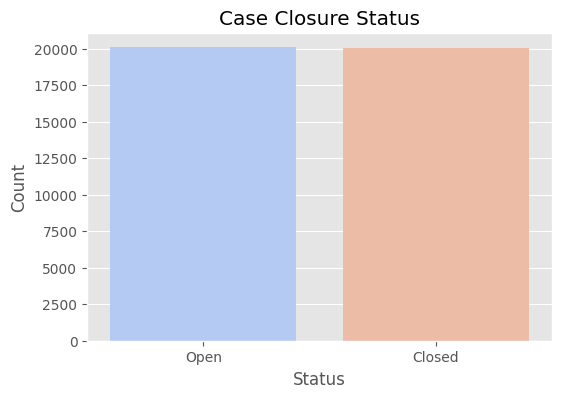

In [102]:
plt.figure(figsize=(6, 4))
sns.countplot(x=df['Case Status'], palette='coolwarm', hue=df['Case Status'], legend=False)
plt.title("Case Closure Status")
plt.xlabel("Status")
plt.ylabel("Count")
plt.show()

- Similar Distribution: The number of cases open and closed has a similar spread, suggesting that deployment numbers do not drastically differ between the two case statuses.

In [88]:
df['Police Deployed'].unique()

array([13,  9, 15,  1, 18,  8,  4,  5,  3, 19, 16,  6,  2, 14,  7, 11, 10,
       17, 12], dtype=int64)

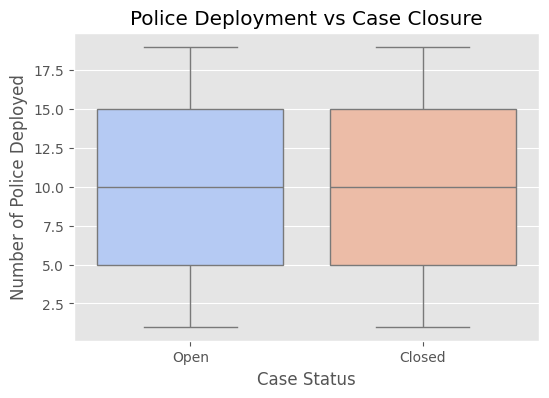

In [103]:
plt.figure(figsize=(6, 4))
sns.boxplot(x='Case Status', y='Police Deployed', data=df, palette='coolwarm', hue=df['Case Status'], legend=False)
plt.title("Police Deployment vs Case Closure")
plt.xlabel("Case Status")
plt.ylabel("Number of Police Deployed")
plt.show()

- Similar Distribution: The number of police deployed for both open and closed cases has a similar spread, suggesting that deployment numbers do not drastically differ between the two case statuses.

- Median Comparison: The median number of police deployed appears to be almost the same for both open and closed cases.

- Interquartile Range (IQR): The middle 50% of the data (IQR) is similar for both categories, indicating that typical police deployment numbers remain consistent regardless of case closure status.

- Whiskers and Outliers: The whiskers suggest that the minimum and maximum deployment numbers are also similar between the two categories.

- No Clear Relationship: Since the distribution of police deployment is similar for both open and closed cases, it implies that simply deploying more police does not necessarily lead to case closure.

## Bivariate & Multivariate Analysis


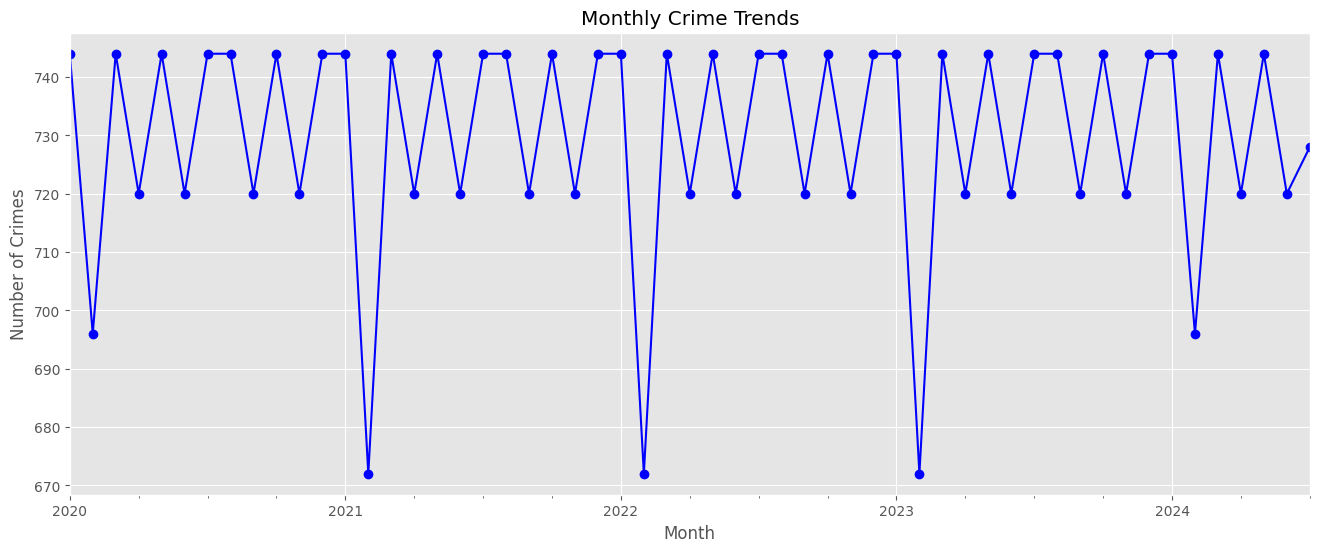

In [104]:
# crime trend over time
plt.figure(figsize=(16, 6))
df.resample('ME', on='Date of Occurrence').size().plot(kind='line', marker='o', color='blue', grid=True)
plt.title("Monthly Crime Trends")
plt.xlabel("Month")
plt.ylabel("Number of Crimes")
plt.show()

- **Cyclical Pattern**: The plot shows a repeating pattern where the number of crimes fluctuates monthly, suggesting a cyclical trend.

- **Regular Peaks and Troughs**: Crime numbers alternate between high and low points consistently, indicating possible seasonal variations or periodic factors affecting crime rates.

- **Significant Dips**: There are noticeable sharp declines in crime numbers at specific points each year, suggesting possible external influences such as policy changes, law enforcement efforts, or seasonal effects.

- **Overall Stability**: Despite fluctuations, the overall number of crimes remains within a relatively stable range, showing no strong long-term upward or downward trend.
- **Potential Anomalies**: The drastic drops in crime numbers could indicate data recording issues, specific interventions, or unusual events reducing crime temporarily.

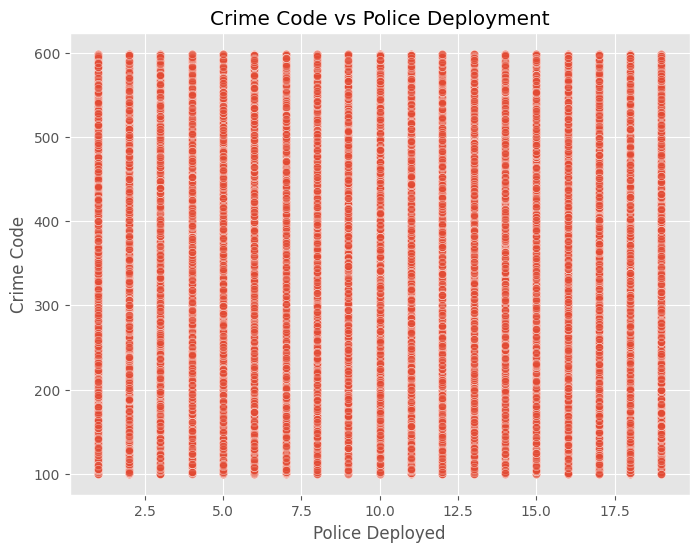

In [105]:
# 3.2 Crime vs. Police Deployment
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Police Deployed', y='Crime Code', data=df, alpha=0.5)
plt.title("Crime Code vs Police Deployment")
plt.xlabel("Police Deployed")
plt.ylabel("Crime Code")
plt.show()

- **Even Distribution**: The data points are evenly spaced across different levels of police deployment, suggesting that police are deployed consistently across various crime codes.

- **Vertical Clustering**: Each value of police deployment has multiple crime codes associated with it, indicating that a fixed number of police units handle a wide range of crime types.

- **Lack of Clear Trend**: There is no strong visible correlation between crime codes and the number of police deployed, meaning police deployment does not appear to be specifically targeted to particular crime codes.

- **Possible Data Encoding Pattern**: The alignment of points in vertical lines suggests that crime codes are categorical values rather than continuous variables, reinforcing the idea that different crimes receive similar levels of police response.

In [149]:
# Get unique crime codes

crime_codes = df['Crime Code'].unique()
num_groups = 16                 # Number of small groups
crime_groups = np.array_split(crime_codes, num_groups)

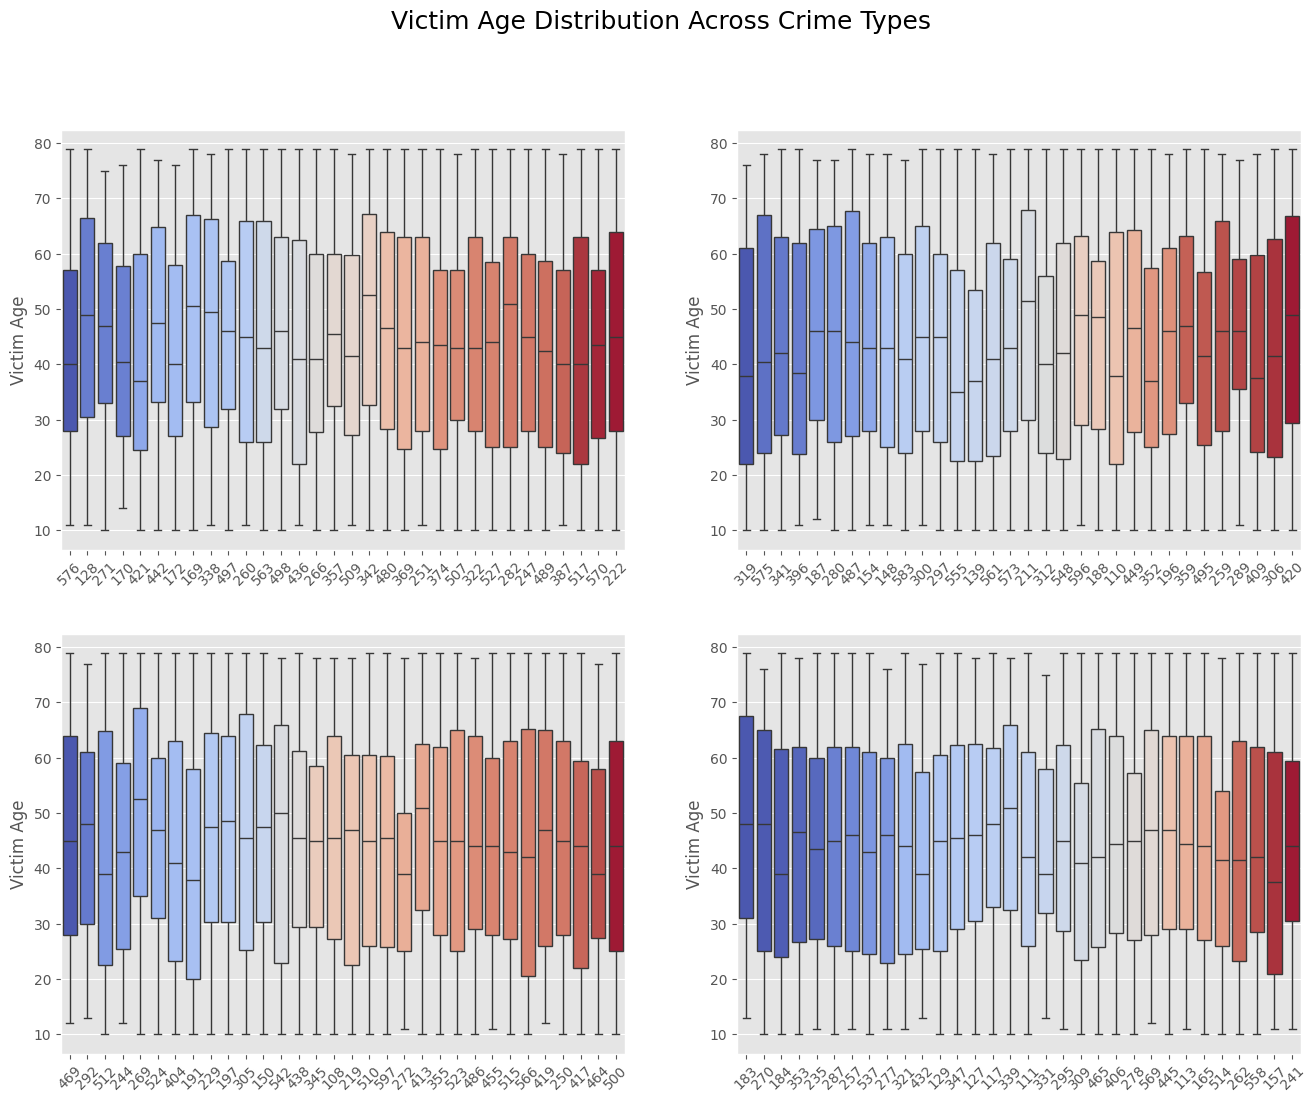

In [151]:
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle("Victim Age Distribution Across Crime Types", fontsize=18)

for ax, codes in zip(axes.flatten(), crime_groups[:4]):
    sns.boxplot(x='Crime Code', y='Victim Age', data=df[df['Crime Code'].isin(codes)], 
                palette='coolwarm', hue='Crime Code', ax=ax, legend=False)
    
    tick_positions = range(len(codes))
    ax.set_xticks(tick_positions)
    ax.set_xticklabels(codes, rotation=45)
    ax.set_xlabel("")
    ax.set_ylabel("Victim Age", fontsize=12)

plt.subplots_adjust(hspace=0.2, wspace=0.2)
plt.show()

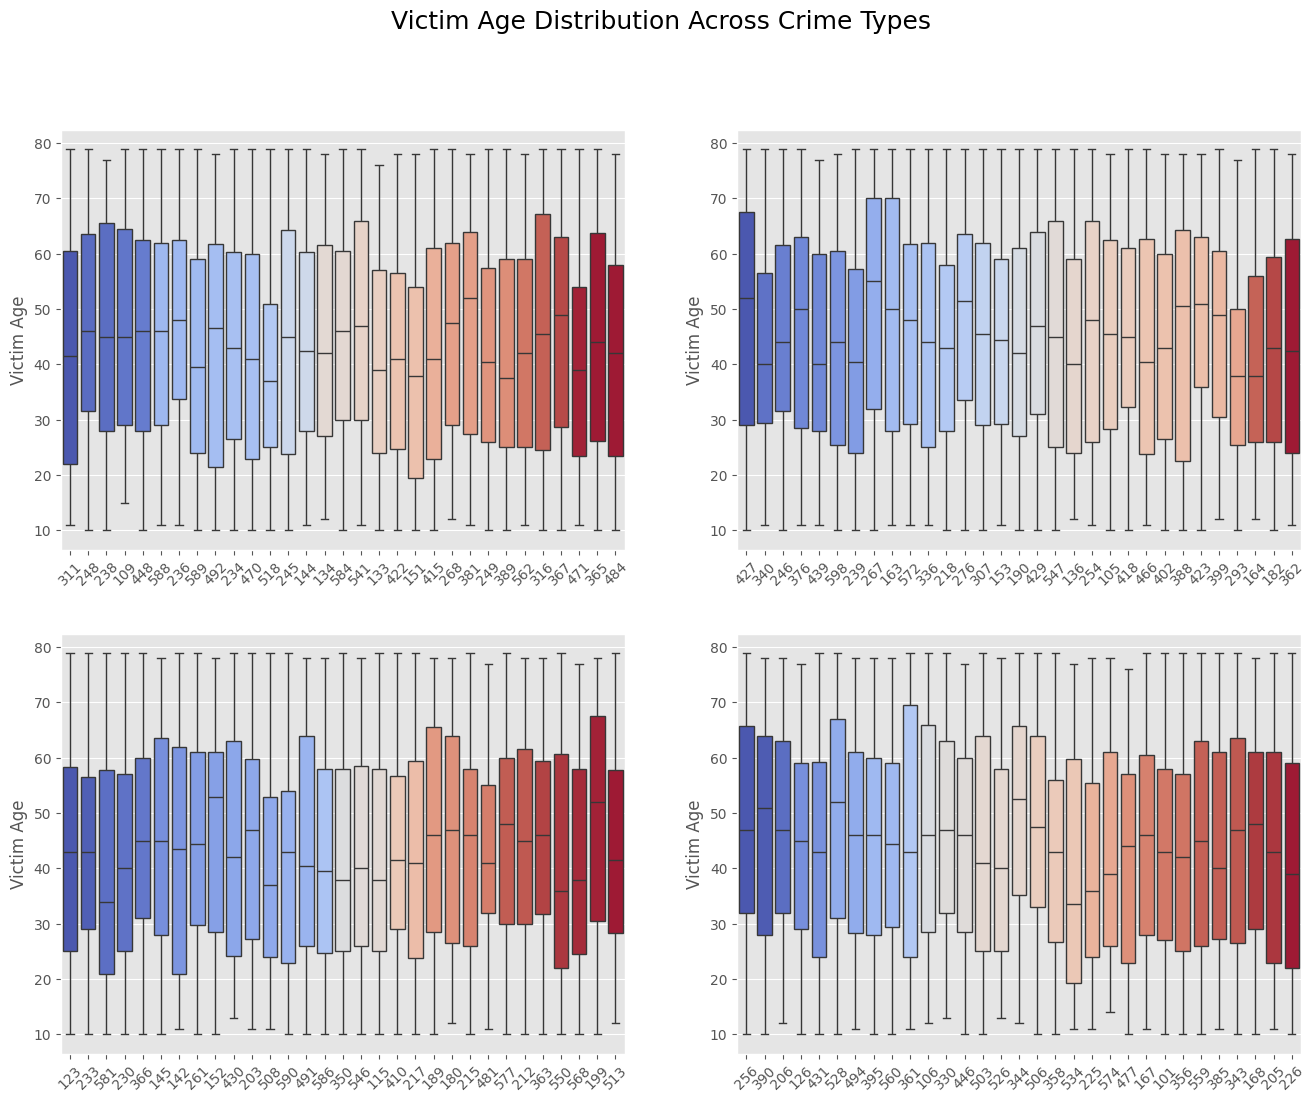

In [152]:
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle("Victim Age Distribution Across Crime Types", fontsize=18)

for ax, codes in zip(axes.flatten(), crime_groups[4:8]):
    sns.boxplot(x='Crime Code', y='Victim Age', data=df[df['Crime Code'].isin(codes)], 
                palette='coolwarm', hue='Crime Code', ax=ax, legend=False)
    
    tick_positions = range(len(codes))
    ax.set_xticks(tick_positions)
    ax.set_xticklabels(codes, rotation=45)
    ax.set_xlabel("")
    ax.set_ylabel("Victim Age", fontsize=12)

plt.subplots_adjust(hspace=0.2, wspace=0.2)
plt.show()

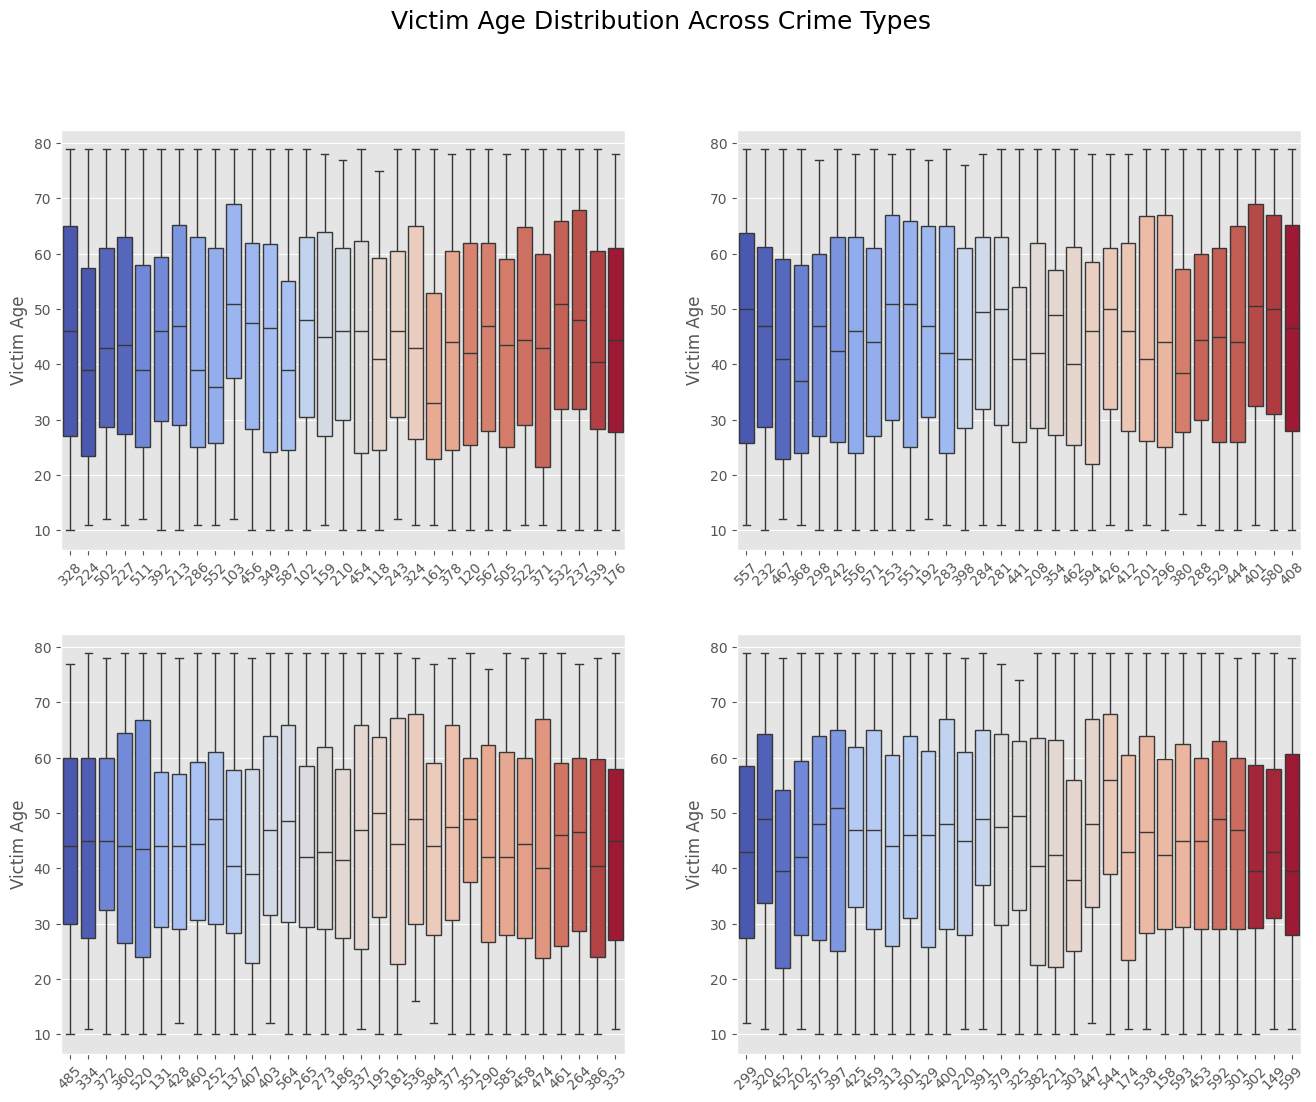

In [136]:
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle("Victim Age Distribution Across Crime Types", fontsize=18)

for ax, codes in zip(axes.flatten(), crime_groups[8:12]):
    sns.boxplot(x='Crime Code', y='Victim Age', data=df[df['Crime Code'].isin(codes)], 
                palette='coolwarm', hue='Crime Code', ax=ax, legend=False)
    
    tick_positions = range(len(codes))
    ax.set_xticks(tick_positions)
    ax.set_xticklabels(codes, rotation=45)
    ax.set_xlabel("")
    ax.set_ylabel("Victim Age", fontsize=12)

plt.subplots_adjust(hspace=0.2, wspace=0.2)
plt.show()

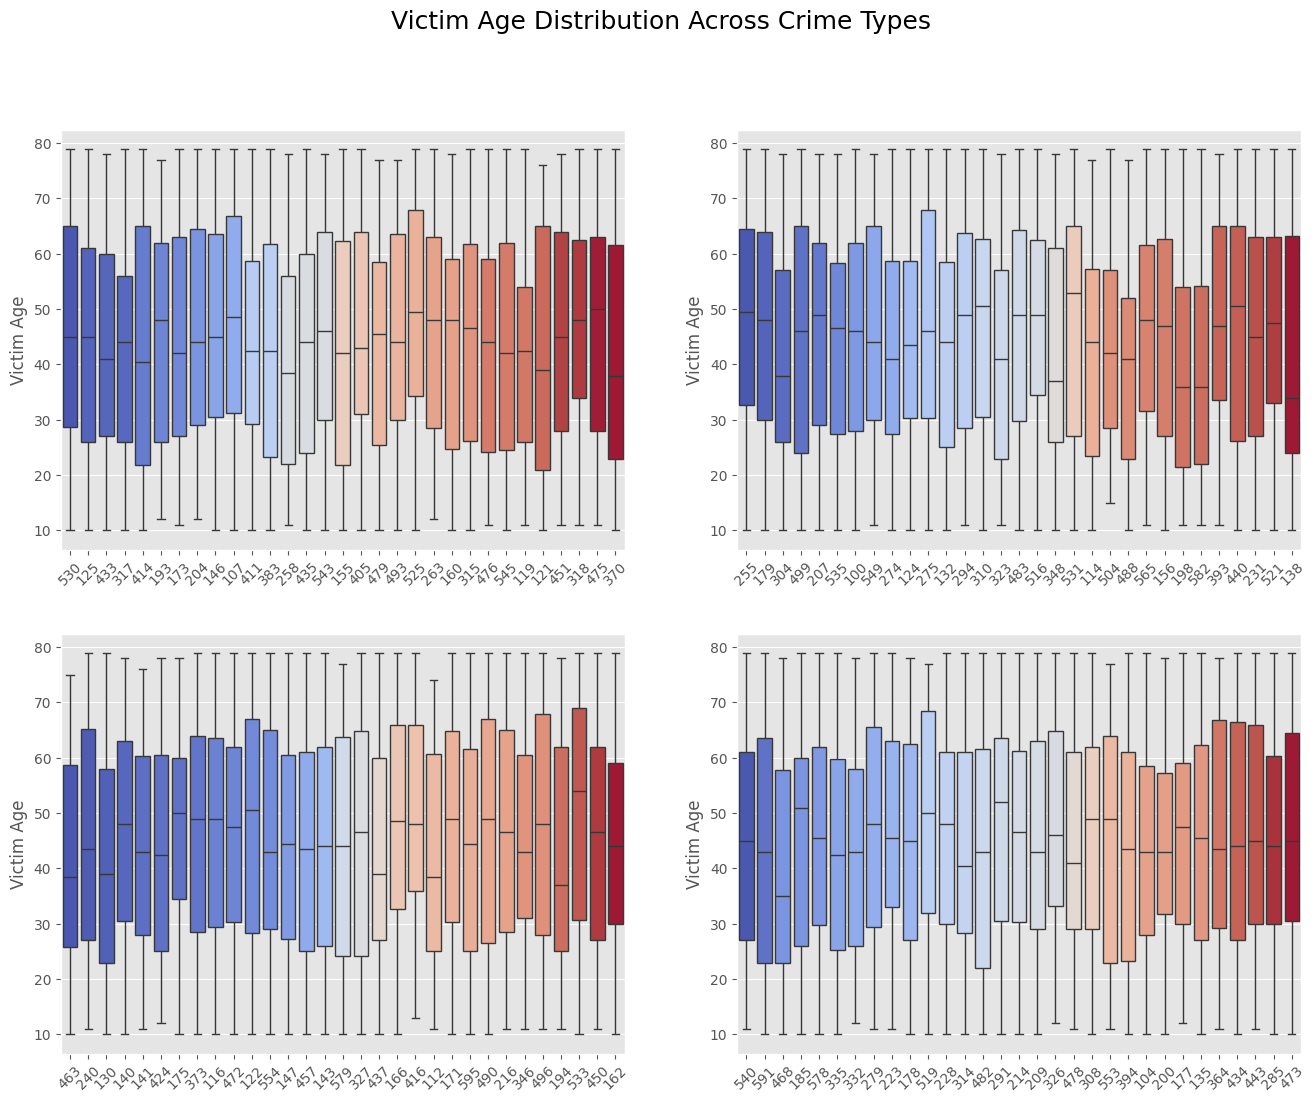

In [137]:
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle("Victim Age Distribution Across Crime Types", fontsize=18)

for ax, codes in zip(axes.flatten(), crime_groups[12:16]):
    sns.boxplot(x='Crime Code', y='Victim Age', data=df[df['Crime Code'].isin(codes)], 
                palette='coolwarm', hue='Crime Code', ax=ax, legend=False)
    
    tick_positions = range(len(codes))
    ax.set_xticks(tick_positions)
    ax.set_xticklabels(codes, rotation=45)
    ax.set_xlabel("")
    ax.set_ylabel("Victim Age", fontsize=12)

plt.subplots_adjust(hspace=0.2, wspace=0.2)
plt.show()

### Inferences from Victim Age Distribution Across Crime Types

1. **Age Variability Across Crime Types**: The boxplots show that the age distribution of victims varies significantly across different crime types. Some crime types have a wider age range of victims, while others are more concentrated around specific age groups.

2. **Young Victims Predominance**: For many crime types, the median age of victims tends to be on the younger side, indicating that younger individuals are more frequently targeted or affected by these crimes.

3. **Outliers and Extreme Values**: There are noticeable outliers in several crime types, suggesting that while the majority of victims fall within a certain age range, there are occasional victims who are significantly older or younger.

4. **Consistent Patterns**: Some crime types show consistent patterns in victim age distribution across different groups, indicating that these crimes consistently affect certain age demographics.

5. **Crime-Specific Trends**: Certain crime types have distinct age distributions, which could be indicative of the nature of the crime and the typical profile of the victims involved.

These inferences can help in understanding the demographic impact of different crime types and aid in developing targeted prevention and intervention strategies.

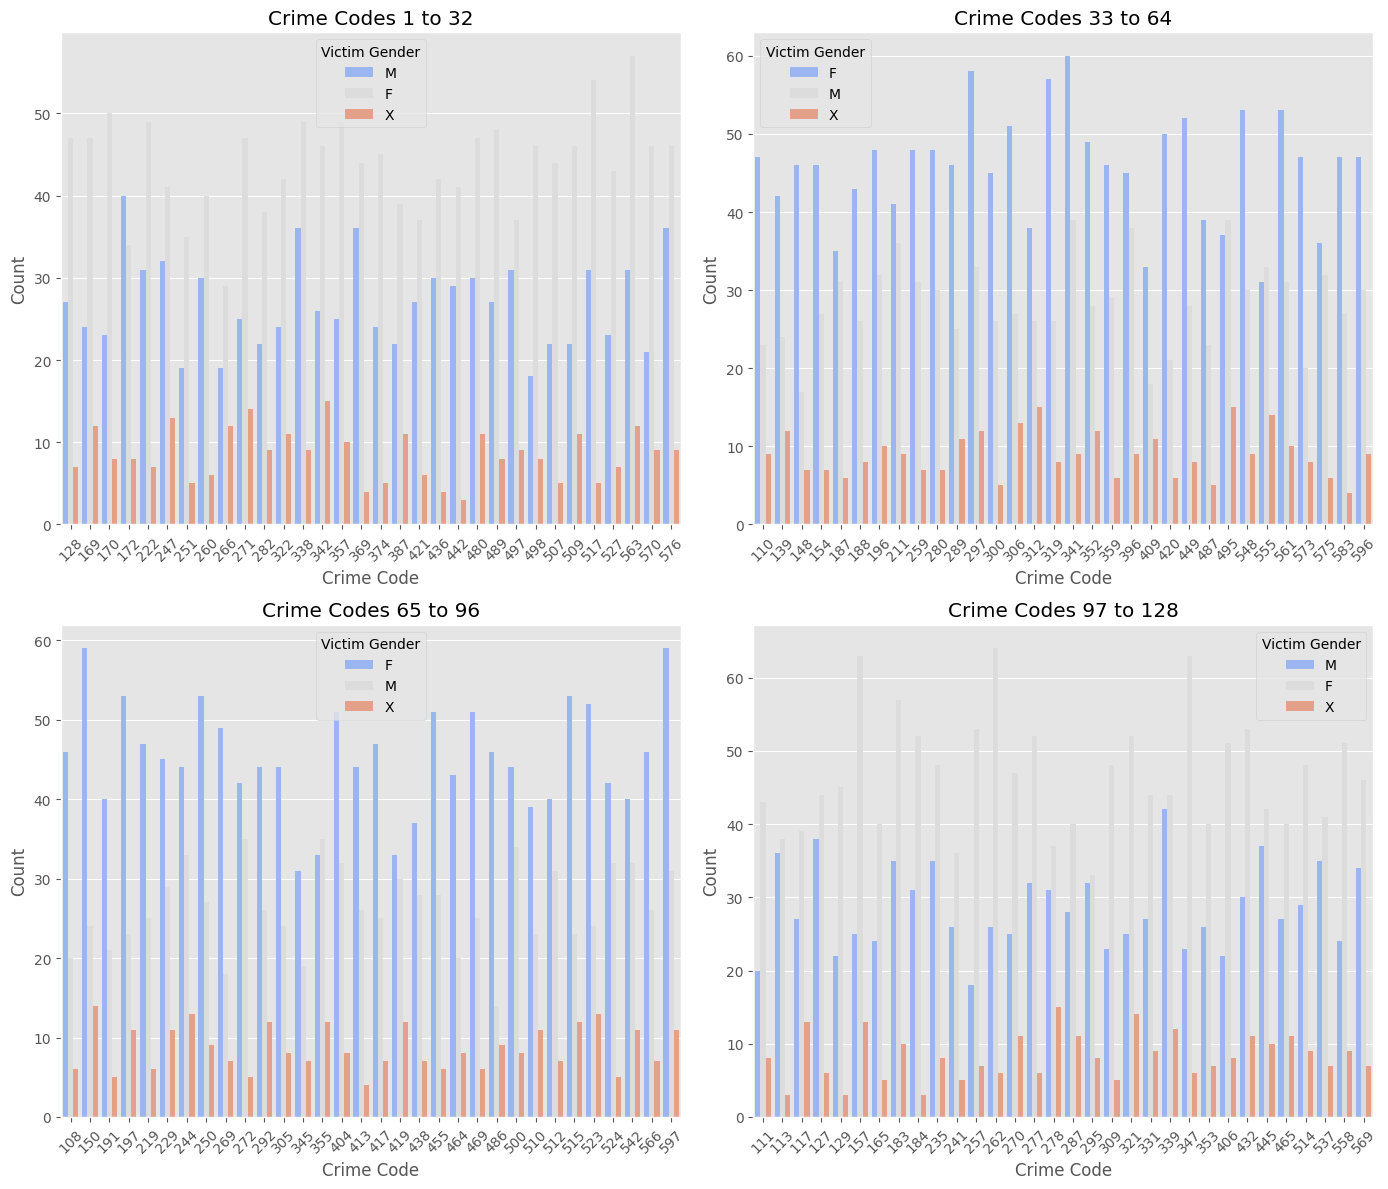

In [167]:
crime_codes = df['Crime Code'].unique()
num_subplots = 16  # Total subplots
codes_per_subplot = len(crime_codes) // num_subplots + 1  

fig, axes = plt.subplots(2, 2, figsize=(14, 12))  

for i, ax in enumerate(axes.flatten()):
    start_idx = i * codes_per_subplot
    end_idx = start_idx + codes_per_subplot
    subset_codes = crime_codes[start_idx:end_idx]
    
    subset_df = df[df['Crime Code'].isin(subset_codes)]
    
    sns.countplot(x='Crime Code', hue='Victim Gender', data=subset_df, palette='coolwarm', ax=ax)
    ax.set_title(f"Crime Codes {start_idx+1} to {end_idx}")
    ax.set_xlabel("Crime Code")
    ax.set_ylabel("Count")
    ax.set_xticks(range(len(subset_codes)))
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

plt.tight_layout()
plt.show()

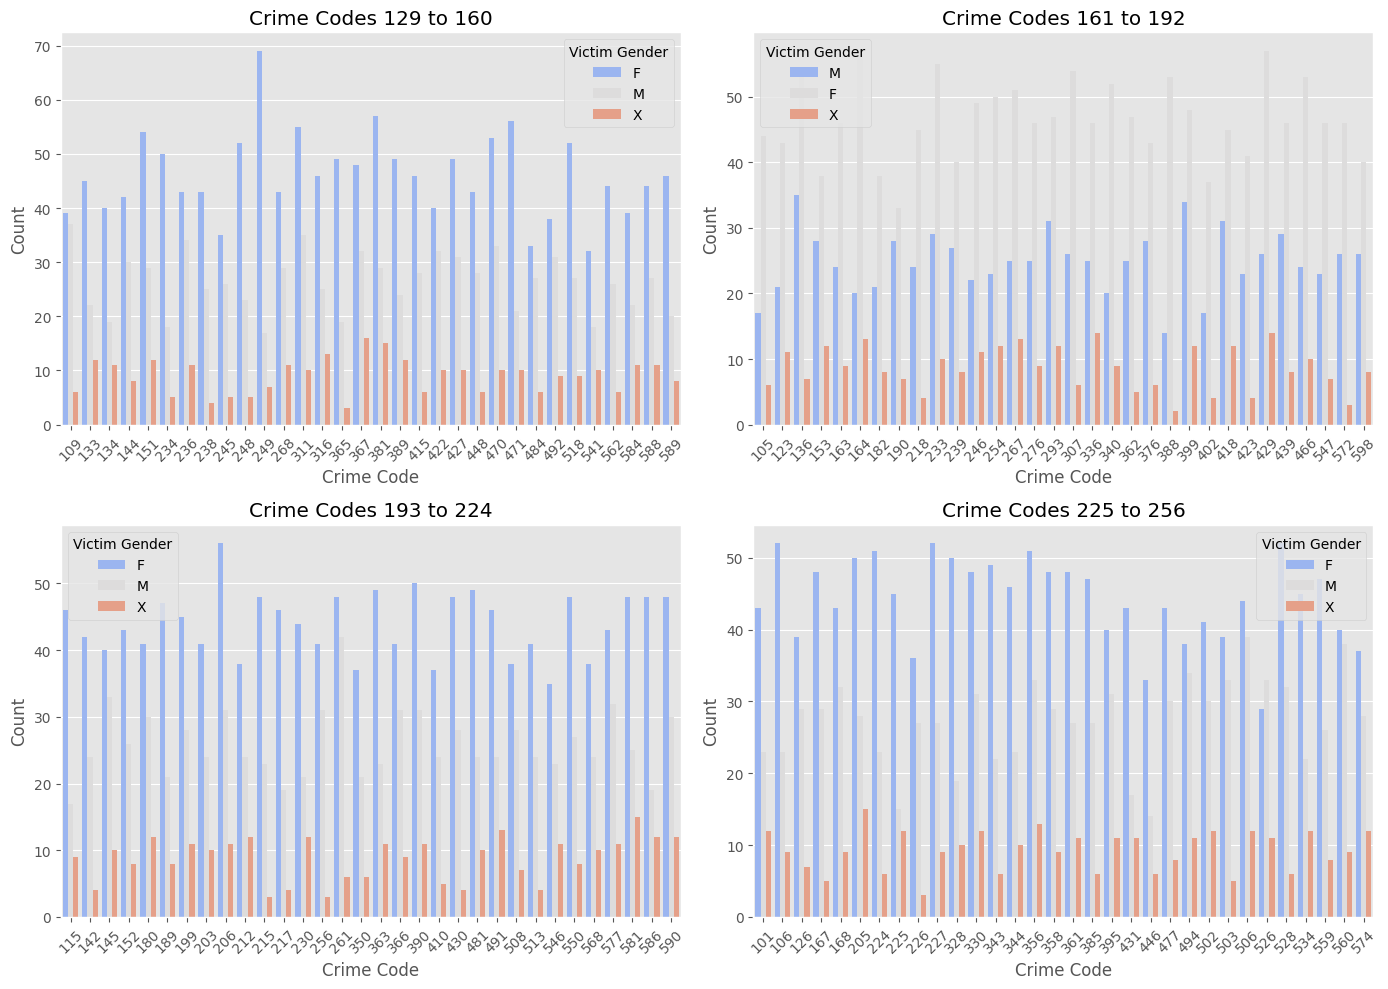

In [168]:
fig, axes = plt.subplots(2, 2, figsize=(14, 10))  

for i, ax in enumerate(axes.flatten(), start=4):
    start_idx = i * codes_per_subplot
    end_idx = start_idx + codes_per_subplot
    subset_codes = crime_codes[start_idx:end_idx]
    
    subset_df = df[df['Crime Code'].isin(subset_codes)]
    
    sns.countplot(x='Crime Code', hue='Victim Gender', data=subset_df, palette='coolwarm', ax=ax)
    ax.set_title(f"Crime Codes {start_idx+1} to {end_idx}")
    ax.set_xlabel("Crime Code")
    ax.set_ylabel("Count")
    ax.set_xticks(range(len(subset_codes)))
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

plt.tight_layout()
plt.show()

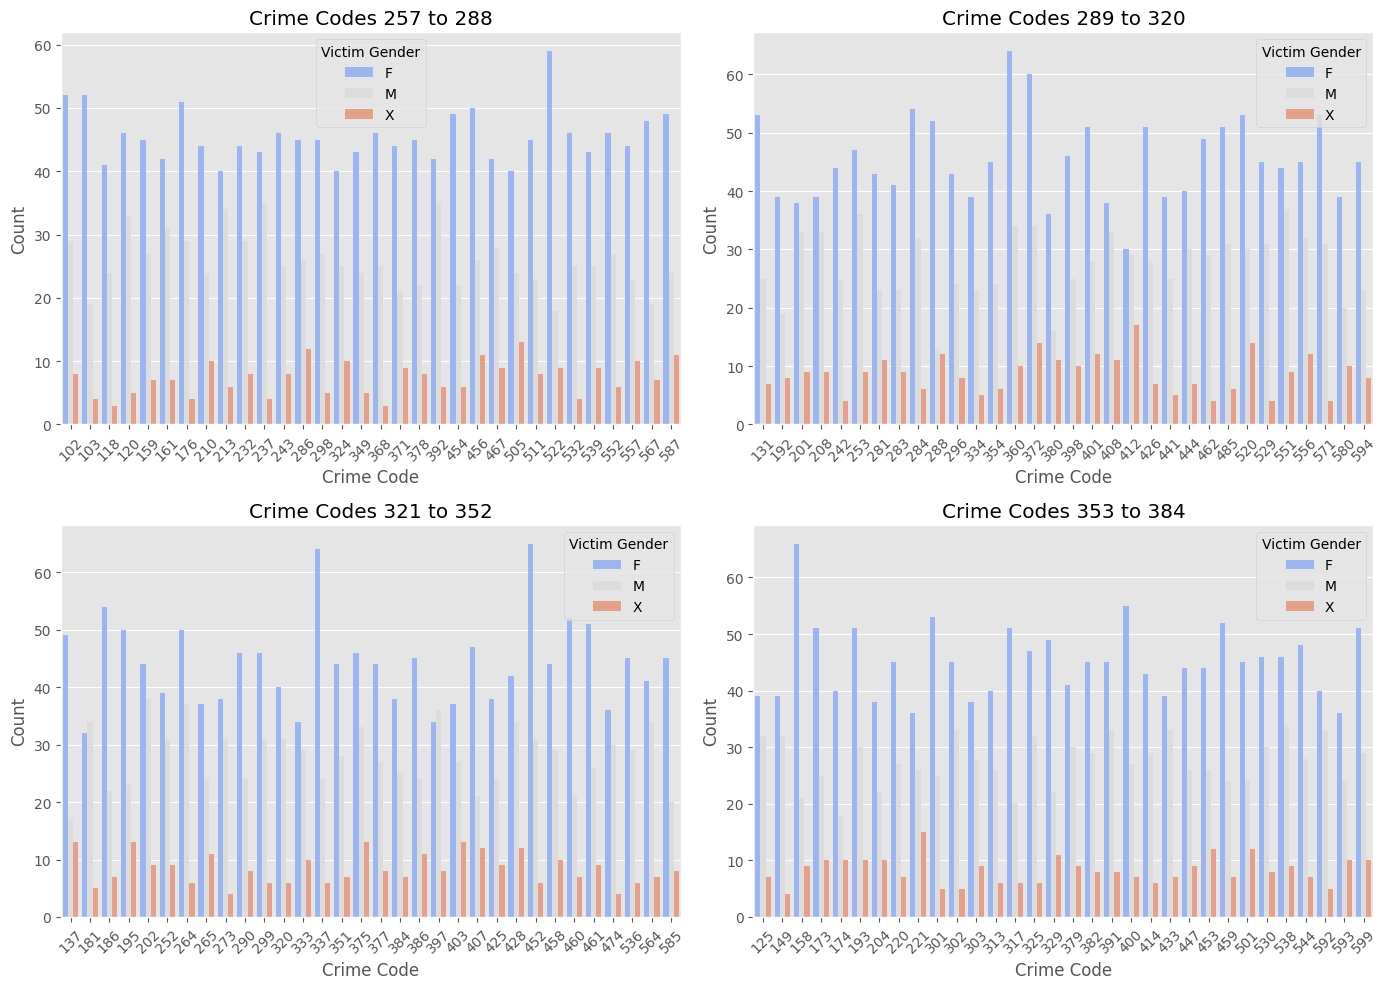

In [169]:
fig, axes = plt.subplots(2, 2, figsize=(14, 10))  

for i, ax in enumerate(axes.flatten(), start=8):
    start_idx = i * codes_per_subplot
    end_idx = start_idx + codes_per_subplot
    subset_codes = crime_codes[start_idx:end_idx]
    
    subset_df = df[df['Crime Code'].isin(subset_codes)]
    
    sns.countplot(x='Crime Code', hue='Victim Gender', data=subset_df, palette='coolwarm', ax=ax)
    ax.set_title(f"Crime Codes {start_idx+1} to {end_idx}")
    ax.set_xlabel("Crime Code")
    ax.set_ylabel("Count")
    ax.set_xticks(range(len(subset_codes)))
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

plt.tight_layout()
plt.show()


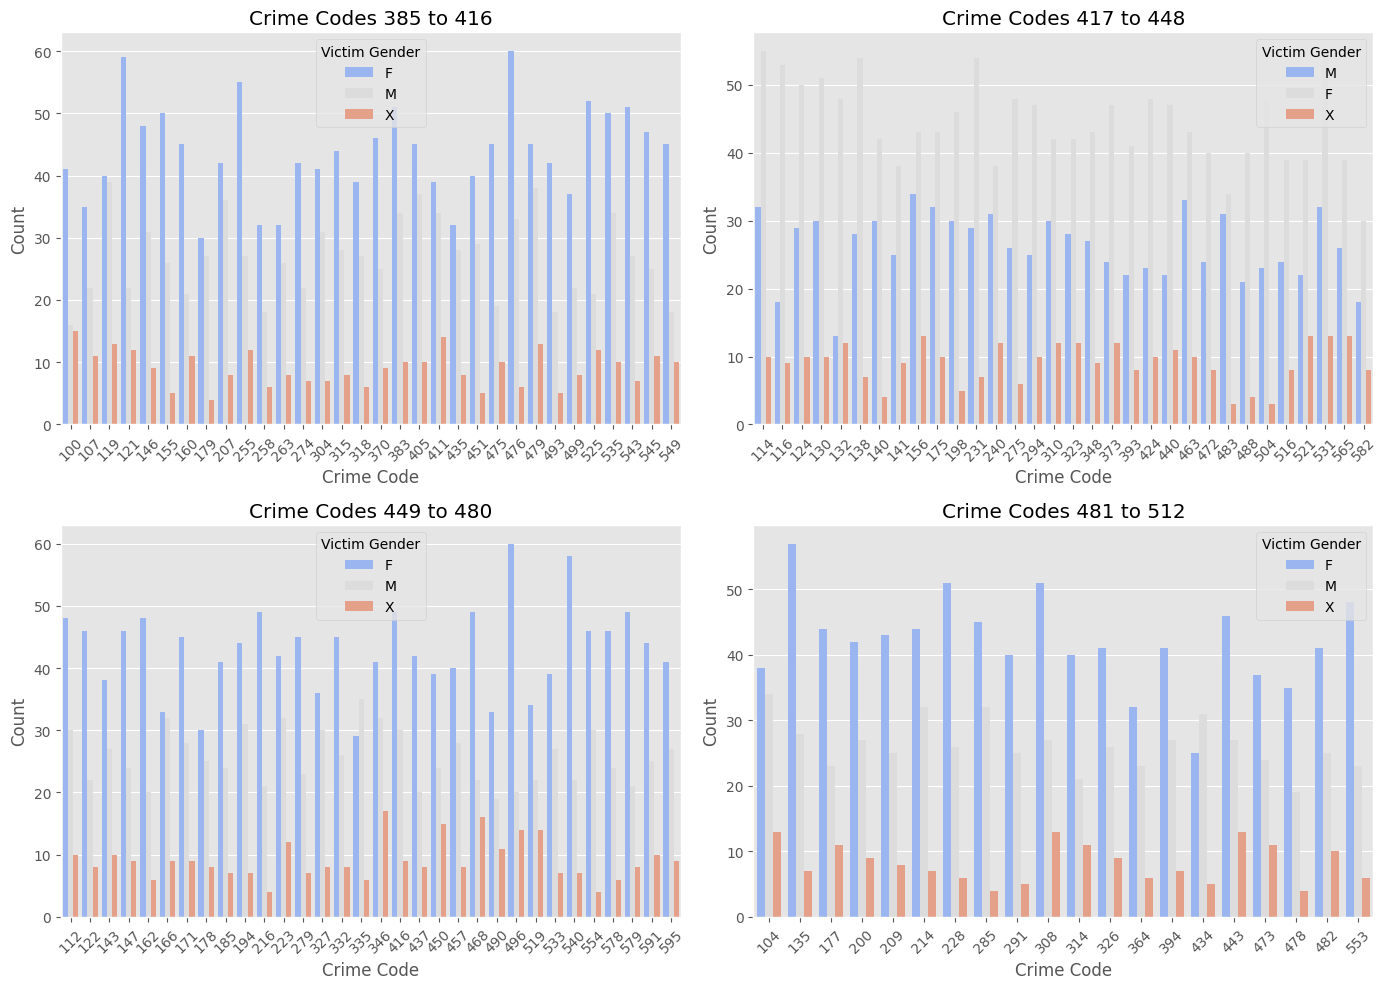

In [170]:
fig, axes = plt.subplots(2, 2, figsize=(14, 10))  

for i, ax in enumerate(axes.flatten(), start=12):
    start_idx = i * codes_per_subplot
    end_idx = start_idx + codes_per_subplot
    subset_codes = crime_codes[start_idx:end_idx]
    
    subset_df = df[df['Crime Code'].isin(subset_codes)]
    
    sns.countplot(x='Crime Code', hue='Victim Gender', data=subset_df, palette='coolwarm', ax=ax)
    ax.set_title(f"Crime Codes {start_idx+1} to {end_idx}")
    ax.set_xlabel("Crime Code")
    ax.set_ylabel("Count")
    ax.set_xticks(range(len(subset_codes)))
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

plt.tight_layout()
plt.show()

### Inferences from Crime Code vs Count by Victim Gender

1. **Gender Disparity**: The plots indicate that, in general, female victims are more prevalent than male victims across various crime codes. This suggests a gender disparity in victimization rates.

2. **Crime-Specific Trends**: Some crime codes show a significant difference in the number of male and female victims, while others show a more balanced distribution. This indicates that certain crimes may disproportionately affect one gender over the other.

3. **Moderate Differences**: For some crime codes, the difference in victim counts between genders is moderate, suggesting that these crimes affect both genders relatively equally.

4. **Policy Implications**: Understanding these gender-specific trends can help in formulating targeted policies and interventions to protect vulnerable groups and address the underlying causes of gender-based victimization.

5. **Further Analysis**: These observations warrant further investigation into the nature of crimes and the socio-economic factors contributing to the observed gender disparities in victimization

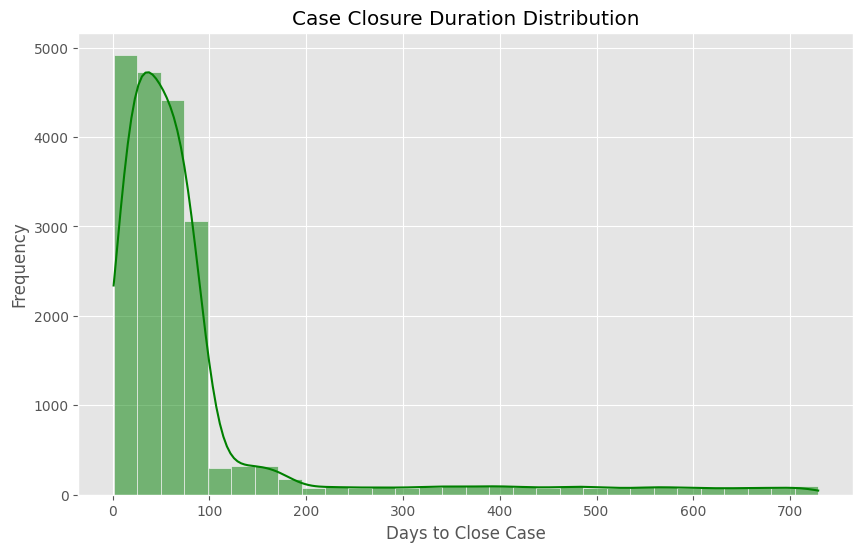

In [206]:
# 3.5 Case Closure Duration
df['Case Closure Duration'] = (df['Date Case Closed'] - df['Date Reported']).dt.days
plt.figure(figsize=(10, 6))
sns.histplot(df['Case Closure Duration'].dropna(), bins=30, kde=True, color='green')
plt.title("Case Closure Duration Distribution")
plt.xlabel("Days to Close Case")
plt.ylabel("Frequency")
plt.show()

In [209]:
print("Mean number of days for code closing: ", df['Case Closure Duration'].mean())
print("Standard Deviation of number of days for code closing: ", df['Case Closure Duration'].std())

Mean number of days for code closing:  88.05782075565746
Standard Deviation of number of days for code closing:  130.05674276853358


### Inferences from Case Closure Duration Distribution

1. **Distribution Shape**: The histogram shows a right-skewed distribution, indicating that most cases are closed within a shorter duration, but there are some cases that take significantly longer to close.

2. **Peak Closure Duration**: The highest frequency of case closures occurs within a relatively short number of days, suggesting that a majority of cases are resolved quickly.

3. **Long Tail**: The long tail of the distribution suggests that while most cases are closed quickly, there are a few cases that remain open for an extended period, possibly due to complexity or other factors.

5. **Implications for Case Management**: Understanding the distribution of case closure durations can help in identifying bottlenecks and improving the efficiency of case resolution processes.

## Adavanced Insights

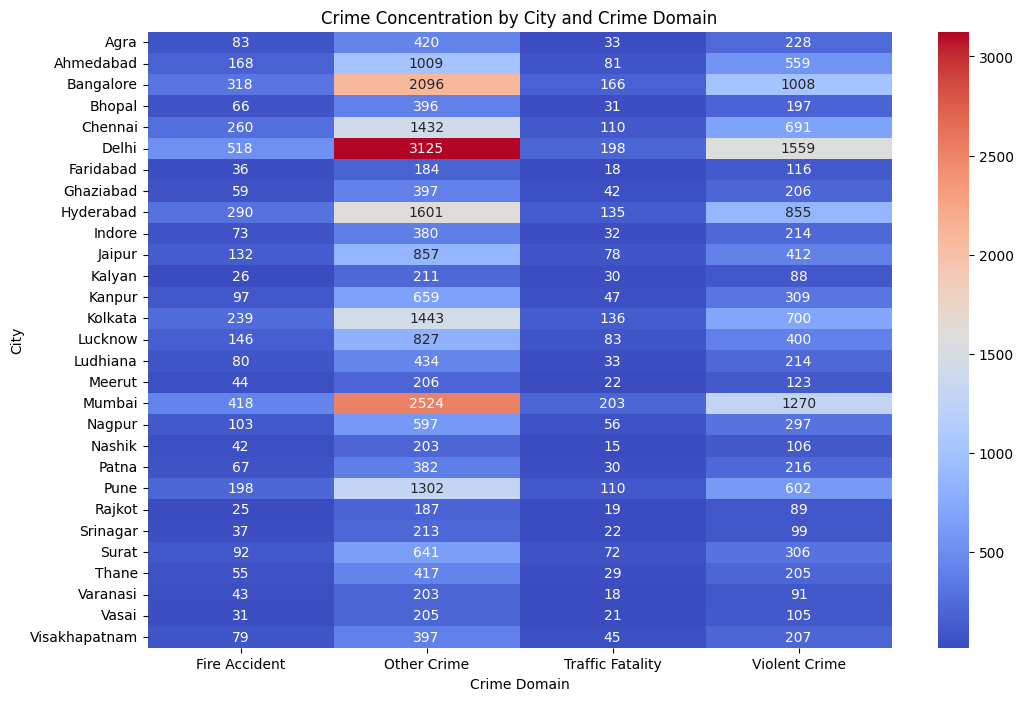

In [47]:
# 4.1 Heatmap for Crime Concentration
plt.figure(figsize=(12, 8))
pivot_table = df.pivot_table(index='City', columns='Crime Domain', values='Crime Code', aggfunc='count')
sns.heatmap(pivot_table, cmap='coolwarm', annot=True, fmt='g')
plt.title("Crime Concentration by City and Crime Domain")
plt.show()

### Inferences from Crime Concentration Heatmap

1. **City-Specific Crime Patterns**: The heatmap reveals distinct patterns of crime concentration across different cities and crime domains. Some cities exhibit high concentrations of specific crime domains, indicating localized crime trends.

2. **High Crime Domains**: Certain crime domains show high counts across multiple cities, suggesting these crimes are more prevalent and widespread.

3. **Low Crime Domains**: Conversely, some crime domains have low counts or are absent in many cities, indicating these crimes are less common or more localized.

4. **Policy Implications**: Understanding the concentration of different crime domains in various cities can help law enforcement agencies allocate resources more effectively and develop targeted crime prevention strategies.

5. **Further Investigation**: The heatmap highlights areas that may require further investigation to understand the underlying causes of high crime concentrations and develop appropriate interventions.

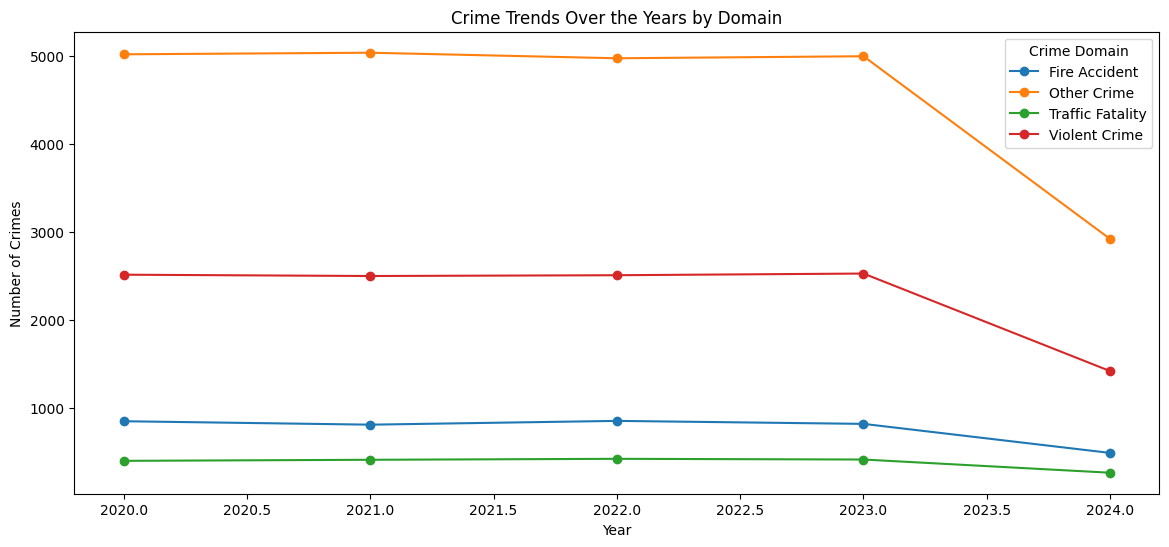

In [48]:
# 4.2 Trend Analysis for Different Crime Domains
df.groupby([df['Date of Occurrence'].dt.year, 'Crime Domain']).size().unstack().plot(kind='line', marker='o', figsize=(14, 6))
plt.title("Crime Trends Over the Years by Domain")
plt.xlabel("Year")
plt.ylabel("Number of Crimes")
plt.show()

### Inferences from Crime Trends Over the Years by Domain

1. **Yearly Trends**: The line plot shows the yearly trends for different crime domains, highlighting how the frequency of various crimes has changed over time.

2. **Increasing/Decreasing Trends**: Some crime domains exhibit a clear increasing or decreasing trend over the years, indicating changes in crime patterns, possibly due to socio-economic factors, law enforcement efforts, or policy changes.

3. **Fluctuations**: Certain crime domains show significant fluctuations from year to year, suggesting that these crimes are influenced by short-term factors or events.

4. **Consistent Patterns**: Some crime domains maintain a relatively stable frequency over the years, indicating persistent issues that may require ongoing attention and intervention.

5. **Emerging Crimes**: The plot may reveal emerging crime domains that have started to appear more frequently in recent years, signaling new challenges for law enforcement and policymakers.

6. **Policy Implications**: Understanding these trends can help in developing targeted strategies to address specific crime domains, allocate resources effectively, and implement preventive measures to curb rising crime trends.

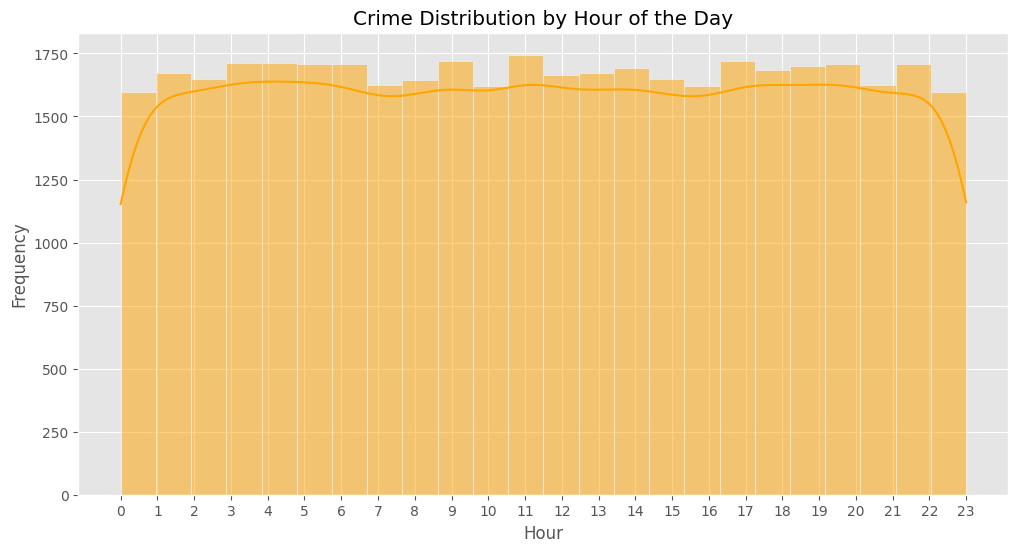

In [18]:
df['Time of Occurrence'] = pd.to_datetime(df['Time of Occurrence'], format='%d-%m-%Y %H:%M')
df['Hour'] = df['Time of Occurrence'].dt.hour  # Extract hour directly

plt.figure(figsize=(12, 6))
sns.histplot(df['Hour'].dropna(), bins=24, kde=True, color='orange')
plt.title("Crime Distribution by Hour of the Day")
plt.xlabel("Hour")
plt.ylabel("Frequency")
plt.xticks(range(0, 24))  # Ensuring x-axis is properly labeled from 0 to 23
plt.show()

### Inferences from Crime Distribution by Hour of the Day

1. **Late Night and Early Morning**: There is a noticeable increase in crime frequency during late night and early morning hours. This could be due to reduced vigilance and fewer people being around during these times.

2. **Consistent Patterns**: The distribution shows consistent patterns of crime occurrences across different hours, indicating that certain times of the day are consistently more dangerous.

6. **Further Investigation**: The observed patterns warrant further investigation into the underlying causes of high crime rates during specific hours, which could include factors such as social behavior, economic conditions, and law enforcement practices.